In [168]:
import pandas as pd
import folium

In [149]:
FILE_PATH = "data_example/raw_csv/"
OUTPUT = "data_example/csv/"
FILENAME = "8279264048.csv"

In [150]:
raw_data=pd.read_csv(FILE_PATH + FILENAME)

In [151]:
raw_data[raw_data["Local Number"]==12].tail(20)

,Type,Local Number,Message,Field 1,Value 1,Units 1,Field 2,Value 2,Units 2,Field 3,...,Field 42,Value 42,Units 42,Field 43,Value 43,Units 43,Field 44,Value 44,Units 44,Unnamed: 135
2198,Data,12,record,timestamp,1031231332,s,position_lat,509997856,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,Data,12,record,timestamp,1031231350,s,position_lat,510000195,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2200,Data,12,record,timestamp,1031231364,s,position_lat,510001678,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2201,Data,12,record,timestamp,1031231365,s,position_lat,510001799,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2202,Data,12,record,timestamp,1031231382,s,position_lat,510003037,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2203,Data,12,record,timestamp,1031231405,s,position_lat,510003206,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2205,Data,12,record,timestamp,1031231413,s,position_lat,510003063,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206,Data,12,record,timestamp,1031231427,s,position_lat,510003180,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2207,Data,12,record,timestamp,1031231438,s,position_lat,510003031,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2208,Data,12,record,timestamp,1031231441,s,position_lat,510002723,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
raw_data.describe()

,Local Number,Value 3,Value 4,Value 6,Value 8,Value 9,Value 10,Value 11,Value 12,Units 13,...,Units 40,Value 41,Units 41,Value 42,Units 42,Value 43,Units 43,Value 44,Units 44,Unnamed: 135
count,2234.000000,2.232000e+03,2.230000e+03,2.155000e+03,2117.000000,2.093000e+03,2.092000e+03,2.091000e+03,2.091000e+03,0.0,...,0.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
mean,11.818263,3.554219e+06,6.349404e+03,1.804062e+03,158.335737,2.437114e+05,1.190784e+03,4.898831e+05,2.281146e+03,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
std,1.468312,3.432629e+07,6.851037e+04,5.477923e+04,431.965524,1.114791e+07,5.428256e+04,1.576616e+07,7.378598e+04,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
25%,12.000000,2.293096e+06,1.480490e+03,0.000000e+00,114.000000,0.000000e+00,0.000000e+00,2.005000e+03,0.000000e+00,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
50%,12.000000,2.301745e+06,3.739775e+03,6.250000e-01,127.000000,4.400000e+01,0.000000e+00,2.246200e+03,6.340000e-01,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
75%,12.000000,2.346637e+06,6.820095e+03,9.240000e-01,143.000000,5.900000e+01,0.000000e+00,2.350100e+03,9.140000e-01,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
max,15.000000,1.031239e+09,2.286019e+06,2.285909e+06,15724.156000,5.100091e+08,2.482788e+06,5.100091e+08,2.482788e+06,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN


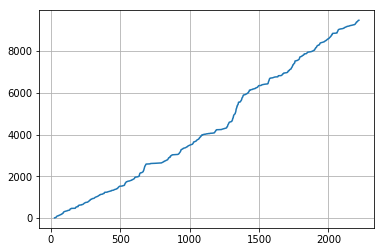

In [153]:
raw_data[raw_data["Local Number"]==12]["Value 4"].plot().grid()

Dataframe final : record 12 + record 14
record 14 : ajouter des colonnes lat lon à null
record 12 supprimer colonnes inutiles
matcher les deux df ssur le df final et réindexer sur le timestamp !

In [154]:
raw_data_12 = raw_data[raw_data["Local Number"]==12][["Local Number",
                                                      "Value 1","Value 2","Value 3","Value 4","Value 5","Value 6",
                                                      "Value 7","Value 8","Value 9","Value 10","Value 11","Value 12"]]
raw_data_12=raw_data_12.rename(columns={"Local Number":"datatype", "Value 1": "time", "Value 2": "lat","Value 3": "lon",
                                        "Value 4": "dist", "Value 5": "alti", "Value 6": "spd", "Value 7": "quid",
                                        "Value 8" :"bpm", "Value 9": "cad", "Value 10": "fraq", "Value 11": "alti_corr",
                                        "Value 12": "spd_corr"})

In [155]:
raw_data_12.head(10)

,datatype,time,lat,lon,dist,alti,spd,quid,bpm,cad,fraq,alti_corr,spd_corr
27,12,1,1,1.0,1.00,1,1.000,1,1.0,1.0,1.0,NaN,NaN
28,12,1031213441,510009083,2286019.0,0.00,1833.8000000000002,0.000,300,100.0,59.0,0.0,1833.8,0.000
29,12,1031213442,510009020,2286075.0,0.70,1833.8000000000002,0.000,300,97.0,59.0,0.0,1833.8,0.000
30,12,1031213447,510008603,2286536.0,5.70,1833.8000000000002,0.896,300,100.0,59.0,0.0,1833.8,0.896
31,12,1031213451,510008276,2286858.0,9.49,1833.6,1.045,300,100.0,0.0,0.0,1833.6,1.045
32,12,1031213456,510007714,2287092.0,14.91,1833.6,1.017,300,106.0,0.0,0.0,1833.6,1.017
33,12,1031213460,510007488,2287258.0,17.25,1833.4,0.728,300,109.0,0.0,0.0,1833.4,0.728
34,12,1031213477,510007424,2287643.0,21.89,1830.8000000000002,0.000,300,106.0,0.0,0.0,1830.8,0.000
35,12,1031213481,510007302,2287616.0,22.50,1830.6,0.000,300,103.0,0.0,0.0,1830.6,0.000
36,12,1031213486,510007290,2287619.0,22.71,1830.4,0.000,300,86.0,0.0,0.0,1830.4,0.000


In [156]:
raw_data_14 = raw_data[raw_data["Local Number"]==14][["Local Number",
                                                      "Value 1","Value 2","Value 3","Value 4","Value 5","Value 6",
                                                      "Value 7","Value 8"]]
raw_data_14 = raw_data_14.rename(columns={"Local Number":"datatype", "Value 1": "time", "Value 2": "dist","Value 3": "alt",
                                        "Value 4": "quid", "Value 5": "bpm", "Value 6": "cad", "Value 7": "frac",
                                        "Value 8" :"alti_corr"})

In [157]:
raw_data_14["lat"]=""
raw_data_14["lon"]=""
raw_data_14["spd"]=""
raw_data_14["spd_corr"]=""

In [158]:
raw_data_14.head()

,datatype,time,dist,alt,quid,bpm,cad,frac,alti_corr,lat,lon,spd,spd_corr
103,14,1,1,1.0,1.0,1,1.0,1,NaN,,,,
104,14,1031213970,311.16,1840.2,300.0,122,0.0,0.0,1840.2,,,,
105,14,1031213976,311.16,1840.2,300.0,121,0.0,0.0,1840.2,,,,
106,14,1031213977,311.16,1840.2,300.0,120,0.0,0.0,1840.2,,,,
109,14,1031213981,318.28,1842.6,300.0,119,59.0,0.0,1842.6,,,,


In [159]:
df=raw_data_12.append(raw_data_14)
df = df.set_index("time")

In [160]:
def convert_coordinate(value):
    toReturn = ""
    if type(value)==str and value:
        value = float(value)
    if value and value!=0:
        toReturn = value/((2**32)/360)
    return toReturn

In [161]:
df["lat"] = df.lat.apply(convert_coordinate)

In [162]:
df["lon"] = df.lon.apply(convert_coordinate)

In [163]:
df.head(20)

,alt,alti,alti_corr,bpm,cad,datatype,dist,frac,fraq,lat,lon,quid,spd,spd_corr
time,,,,,,,,,,,,,,
1,NaN,1,NaN,1,1.0,12,1,NaN,1.0,8.3819e-08,8.3819e-08,1,1,NaN
1031213441,NaN,1833.8000000000002,1833.8,100,59.0,12,0,NaN,0.0,42.7485,0.191612,300,0,0
1031213442,NaN,1833.8000000000002,1833.8,97,59.0,12,0.7,NaN,0.0,42.7485,0.191617,300,0,0
1031213447,NaN,1833.8000000000002,1833.8,100,59.0,12,5.7,NaN,0.0,42.7484,0.191655,300,0.896,0.896
1031213451,NaN,1833.6,1833.6,100,0.0,12,9.49,NaN,0.0,42.7484,0.191682,300,1.045,1.045
1031213456,NaN,1833.6,1833.6,106,0.0,12,14.91,NaN,0.0,42.7484,0.191702,300,1.017,1.017
1031213460,NaN,1833.4,1833.4,109,0.0,12,17.25,NaN,0.0,42.7483,0.191716,300,0.728,0.728
1031213477,NaN,1830.8000000000002,1830.8,106,0.0,12,21.89,NaN,0.0,42.7483,0.191748,300,0,0
1031213481,NaN,1830.6,1830.6,103,0.0,12,22.5,NaN,0.0,42.7483,0.191746,300,0,0


In [164]:
OUTPUT + FILENAME

'data_example/csv/8279264048.csv'

In [165]:
df.to_csv(OUTPUT + FILENAME)

In [190]:
latitude = df.lat.values.tolist()
longitude = df.lon.values.tolist()
coor=[]
for i in range(1,len(latitude)):
    if (type(latitude[i])!= str) and (type(longitude[i])!= str) :
        coor.append([latitude[i],longitude[i]])

In [194]:
map = folium.Map(location=coor[1])
folium.PolyLine(locations=coor).add_to( map )
map.save("test.html")